In [4]:
import pandas as pd

df = pd.read_csv("faithful.csv")
print(df.columns)

Index(['eruptions', 'waiting'], dtype='object')


In [8]:
import matplotlib.pyplot as plt


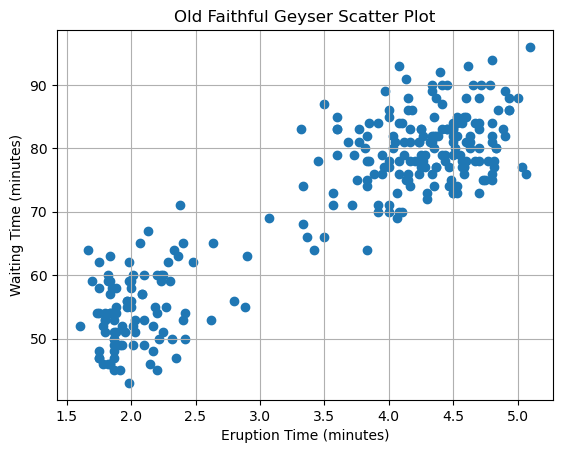

In [10]:
plt.scatter(df['eruptions'], df['waiting'])
plt.xlabel("Eruption Time (minutes)")
plt.ylabel("Waiting Time (minutes)")
plt.title("Old Faithful Geyser Scatter Plot")
plt.grid(True)
plt.show()


## Based on the scatter plot, two distinct clusters can be observed:

One cluster consists of shorter eruption times paired with shorter waiting times.

The other cluster consists of longer eruption times associated with longer waiting times.

Hierarchical clustering is a suitable method for analyzing these groups, as it organizes data into a hierarchy of clusters.

In agglomerative clustering, the approach is bottom-up, where the closest points are gradually merged.

In divisive clustering, the method is top-down, where larger clusters are progressively split into smaller ones.

Given that the clusters in the scatter plot are well-separated, applying hierarchical clustering would be an appropriate choice for this data.



In [14]:
def initialize_centroids(X, k):
    return X[np.random.choice(X.shape[0], k, replace=False)]

def assign_clusters(X, centroids):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(X, labels, k):
    return np.array([X[labels == i].mean(axis=0) for i in range(k)])

def compute_loss(X, centroids, labels):
    return sum(np.linalg.norm(X[i] - centroids[labels[i]])**2 for i in range(len(X)))

In [18]:
import numpy as np


In [20]:
X = df[['eruptions', 'waiting']].values
k = 2  # Based on visual inspection

max_iter = 100
centroids = initialize_centroids(X, k)
losses = []

for _ in range(max_iter):
    labels = assign_clusters(X, centroids)
    new_centroids = update_centroids(X, labels, k)
    loss = compute_loss(X, new_centroids, labels)
    losses.append(loss)

    if np.allclose(centroids, new_centroids):  # convergence check
        break
    centroids = new_centroids

# Save final outputs
final_centroids = centroids
final_labels = labels

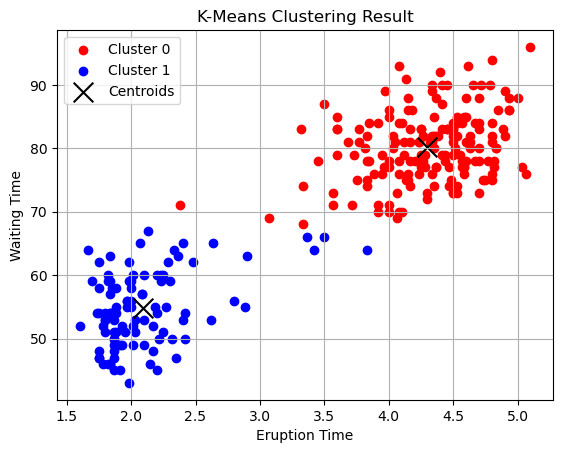

In [22]:
colors = ['red', 'blue']
for i in range(k):
    plt.scatter(X[final_labels == i, 0], X[final_labels == i, 1], c=colors[i], label=f'Cluster {i}')
plt.scatter(final_centroids[:, 0], final_centroids[:, 1], c='black', marker='x', s=200, label='Centroids')
plt.xlabel('Eruption Time')
plt.ylabel('Waiting Time')
plt.title('K-Means Clustering Result')
plt.legend()
plt.grid(True)
plt.show()

The plot illustrates the outcome of K-Means clustering with k=2, where the data points are color-coded by cluster, and the centroids are indicated with 'X' markers.

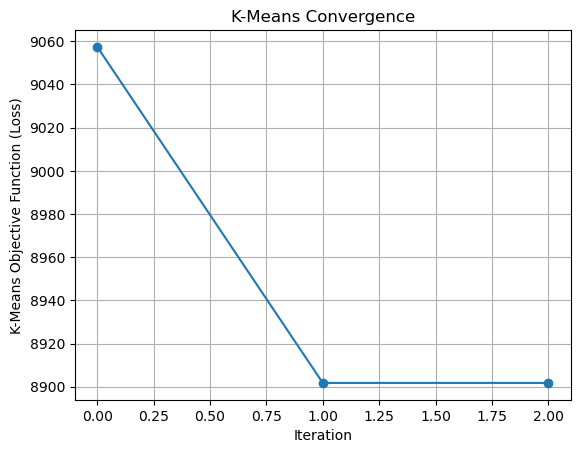

In [27]:
plt.plot(range(len(losses)), losses, marker='o')
plt.xlabel("Iteration")
plt.ylabel("K-Means Objective Function (Loss)")
plt.title("K-Means Convergence")
plt.grid(True)
plt.show()

This plot illustrates the convergence behavior of the K-Means algorithm across iterations. The y-axis displays the loss (objective function), while the x-axis represents the number of iterations. The downward trend of the curve suggests that the algorithm rapidly stabilized the cluster centroids.